Нейронные сети для начинающих. Часть 1

https://habr.com/en/post/312450/

In [212]:
import numpy as np
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd

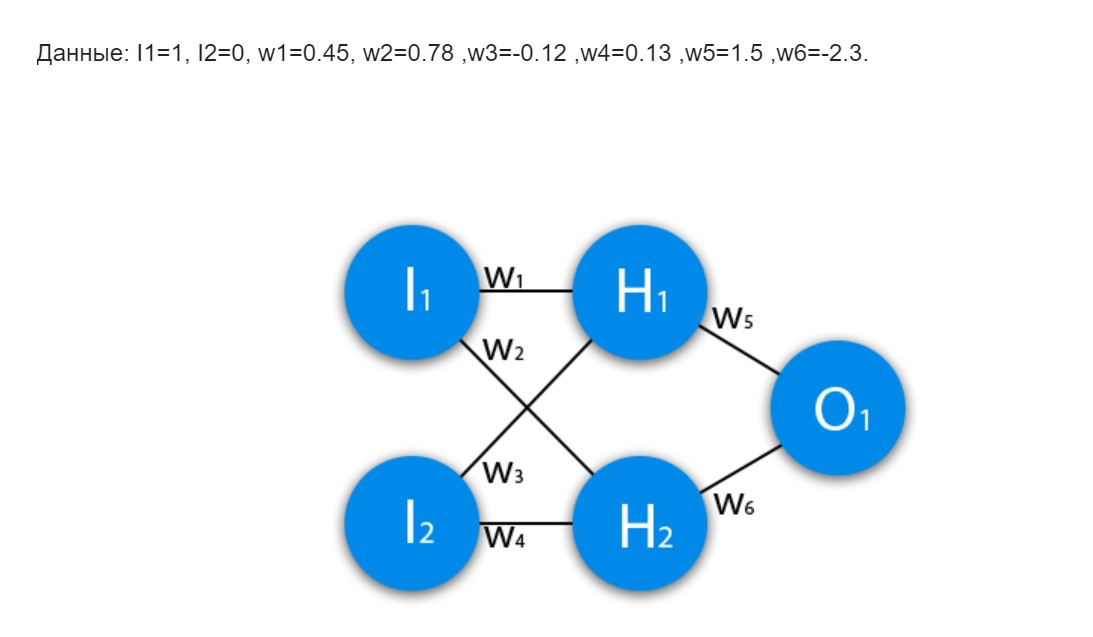

In [213]:
from IPython.display import Image
Image("Screenshot_2.jpg", width=500, height=300)

0xor0=0, 0xor1=1, 1xor0=1,1xor1=0

In [214]:
I1=1
I2=0
w1=0.45
w2=0.78
w3=-0.12
w4=0.13
w5=1.5
w6=-2.3
X_train = [[0,0], [0,1], [1,0], [1,1]]
y_train = [0,1,1,0] 

In [215]:
def sigmo(X):
    return 1 / (1 + np.e**-X)

In [216]:
def rmse(true_val, pred_val):
    from math import sqrt
    
    error = []
    
    for i,n in zip(true_val, pred_val):
        err = (i-n)**2
        error.append(err)
        
    return sqrt(sum(error)/len(error))

In [217]:
def n_net(i1,i2,w1,w2,w3,w4,w5,w6):
    H1_inp = i1*w1 + i2*w3
    H1_out = sigmo(H1_inp)

    H2_inp = i1*w2 + i2*w4
    H2_out = sigmo(H2_inp)

    O1_inp = H1_out*w5 + H2_out*w6
    O1_out = sigmo(O1_inp)

    return O1_out


In [218]:
n = 0
true_vals=[]
pred_vals = []

for x,y in zip(X_train, y_train):
    pred_val = n_net(i1=x[0],i2=x[1],w1=w1,w2=w2,w3=w3,w4=w4,w5=w5,w6=w6)
    print('INPUT:{}'.format(x))
    print('RESULT:{:.3f}'.format(pred_val))
    pred_vals.append(pred_val)
    print('CORRECT:{}'.format(y))
    true_vals.append(y)
    error = (y - pred_val)**2
    print('SQUARED ERROR (по одной итерации) = ({:.3f} - {:.3f})**2 = {:.3f}'.format(y, pred_val, error))
    print('-'*10)
print('RMSE (по эпохе): {:.3f}'.format(rmse(true_vals, pred_vals)))





INPUT:[0, 0]
RESULT:0.401
CORRECT:0
SQUARED ERROR (по одной итерации) = (0.000 - 0.401)**2 = 0.161
----------
INPUT:[0, 1]
RESULT:0.373
CORRECT:1
SQUARED ERROR (по одной итерации) = (1.000 - 0.373)**2 = 0.393
----------
INPUT:[1, 0]
RESULT:0.340
CORRECT:1
SQUARED ERROR (по одной итерации) = (1.000 - 0.340)**2 = 0.435
----------
INPUT:[1, 1]
RESULT:0.317
CORRECT:0
SQUARED ERROR (по одной итерации) = (0.000 - 0.317)**2 = 0.101
----------
RMSE (по эпохе): 0.522


Нейронные сети для начинающих. Часть 2

https://habr.com/ru/post/313216/

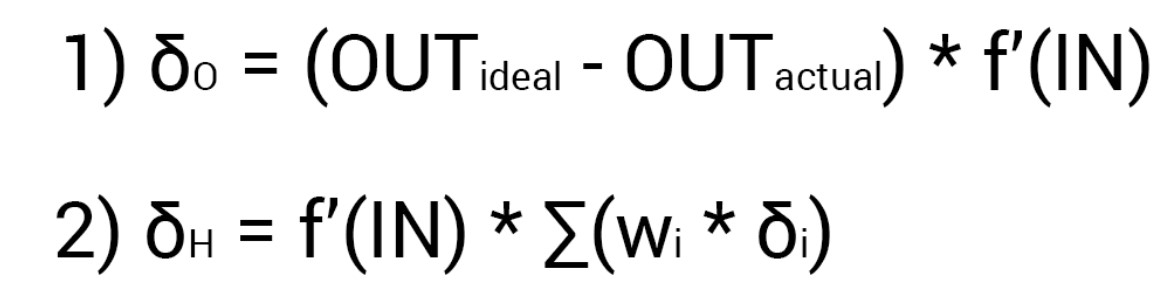

In [219]:
Image("Screenshot_3.jpg", width=500, height=300)

У выходного нейрона нет исходящих синапсов, то мы будем пользоваться первой формулой (δ output), следственно для скрытых нейронов мы уже будем брать вторую формулу (δ hidden).

In [229]:
pred_vals

[0.401312339887548,
 0.3729478806689145,
 0.34049134000389103,
 0.31707183765004815]

In [231]:
true_vals

[0, 1, 1, 0]

Чтобы не делать лишних вычислений, формулу производной можно заменить на более дружелюбную и простую формула вида

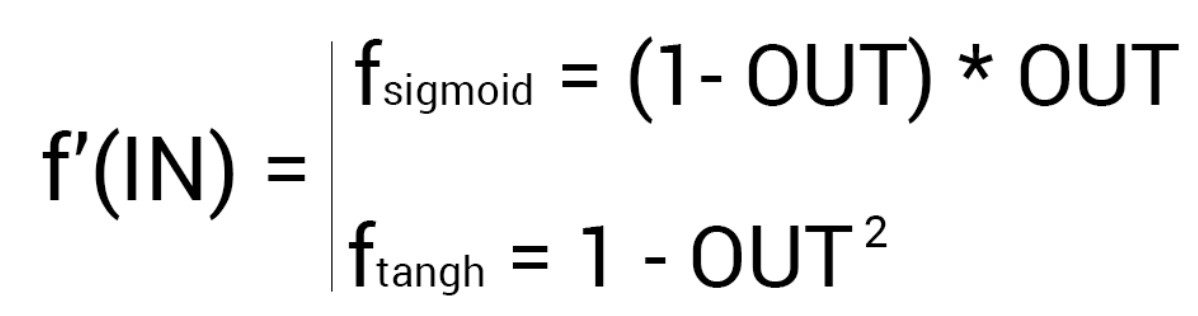

In [255]:
Image("Screenshot_1.jpg", width=500, height=300)

In [240]:
d_out_O1 = (true_vals[2] - pred_vals[2]) * ((true_vals[2] - pred_vals[2])*pred_vals[2])
d_out_O1

0.14809727784386606

На этом вычисления для нейрона O1 закончены. Запомните, что после подсчета дельты нейрона мы обязаны сразу обновить веса всех исходящих синапсов этого нейрона. Так как в случае с O1 их нет, мы переходим к нейронам скрытого уровня и делаем тоже самое за исключение того, что формула подсчета дельты у нас теперь вторая и ее суть заключается в том, чтобы умножить производную функции активации от входного значения на сумму произведений всех исходящих весов и дельты нейрона с которой этот синапс связан. Но почему формулы разные? Дело в том что вся суть МОР заключается в том чтобы распространить ошибку выходных нейронов на все веса НС. Ошибку можно вычислить только на выходном уровне, как мы это уже сделали, также мы вычислили дельту в которой уже есть эта ошибка. Следственно теперь мы будем вместо ошибки использовать дельту которая будет передаваться от нейрона к нейрону. 

In [254]:
H1_out = sigmo(0.45)
print('H1_out:', H1_out)
print('d_out_O1: ', d_out_O1)
print('w5:', w5)

H1_out: 0.610639233949222
d_out_O1:  0.14809727784386606
w5: 1.5


d_hid_H1 = f_sigmoid * w5 * d_out_O1

d_hid_H1 = ((1-H1_out)*H1_out) * (w5 * d_out_O1)

In [257]:
d_hid_H1 = ((1-H1_out)*H1_out) * (w5 * d_out_O1)
d_hid_H1

0.052817182118740695

In [259]:
# проверка
((1-0.61)*0.61) * (1.5 * 0.148)

0.052813799999999994

Теперь нам нужно найти градиент для каждого исходящего синапса. Здесь обычно вставляют 3 этажную дробь с кучей производных и прочим математическим адом, но в этом и вся прелесть использования метода подсчета дельт, потому что в конечном счете ваша формула нахождения градиента будет выглядеть вот так: 

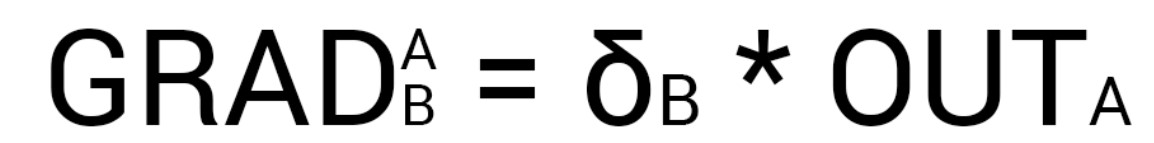

In [261]:
# Здесь точка A это точка в начале синапса, а точка B на конце синапса.
Image("Screenshot_4.jpg", width=500, height=300)

In [262]:
print('H1_out:', H1_out)
print('d_out_O1: ', d_out_O1)

H1_out: 0.610639233949222
d_out_O1:  0.14809727784386606


In [263]:
GRADw5 = H1_out * d_out_O1
GRADw5

0.09043400829254346

In [264]:
# GRADw5 = 0.61 * 0.148 = 0.09
0.61 * 0.148

0.09028

Сейчас у нас есть все необходимые данные чтобы обновить вес w5 и мы сделаем это благодаря функции МОР которая рассчитывает величину на которую нужно изменить тот или иной вес и выглядит она следующим образом:


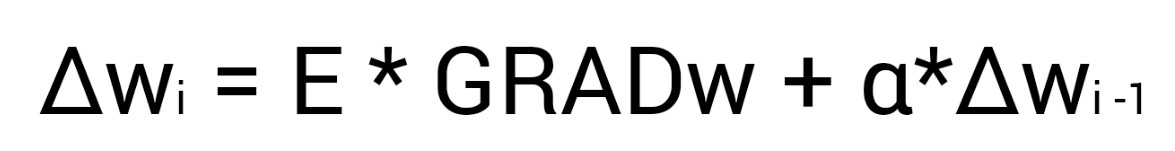

In [266]:
Image("Screenshot_5.jpg", width=500, height=300)

Здесь мы видим 2 константы о которых мы уже говорили, когда рассматривали алгоритм градиентного спуска: E (эпсилон) — скорость обучения, α (альфа) — момент. Переводя формулу в слова получим: изменение веса синапса равно коэффициенту скорости обучения, умноженному на градиент этого веса, прибавить момент умноженный на предыдущее изменение этого веса (на 1-ой итерации равно 0). В таком случае давайте посчитаем изменение веса w5 и обновим его значение прибавив к нему Δw5.


In [275]:
E = 0.7
A = 0.3
print('E:', E)
print('A:', Α)
print('w5:', w5)
print('GRADw5: ', GRADw5)
print('Δw5(i-1): 0')

E: 0.7
A: 0.3
w5: 1.5
GRADw5:  0.09043400829254346
Δw5(i-1): 0


Δw5(i) = E * GRADw5 + A * Δw5(i-1)

Δw5(i) = 0.7 * 0.09 + 0.3 * 0

In [276]:
# руками вычисляем нашу дельту
0.7 * 0.09 + 0.3 * 0

0.063

In [278]:
Δw5 = E * GRADw5 + A * 0
Δw5

0.06330380580478041

In [279]:
# прибавляем к весу w5 нашу дельту
w5 = w5 + Δw5
w5

1.5633038058047803

In [281]:
# Таким образом после применения алгоритма наш вес увеличился на 0.063
1.5633 - 1.5 

0.06329999999999991

Теперь сделаем то же самое для H2

In [289]:
H2_out = sigmo(0.78)
print('H2_out:', H2_out)
print('d_out_O1: ', d_out_O1)
print('w6:', w6)

H2_out: 0.6856801139382539
d_out_O1:  0.14809727784386606
w6: -2.3


Считаем дельту для нейрона скрытого слоя H2

d_hid_H2 = f_sigmoid * w6 * d_out_O1

d_hid_H2 = ((1-H2_out)*H2_out) * (w6 * d_out_O1)

In [290]:
d_hid_H2 = ((1-H2_out)*H2_out) * (w6 * d_out_O1)
d_hid_H2

-0.0734122144418753

In [291]:
# найдем градиент для каждого исходящего синапса

In [292]:
print('H2_out:', H2_out)
print('d_out_O1: ', d_out_O1)

H2_out: 0.6856801139382539
d_out_O1:  0.14809727784386606


In [293]:
GRADw6 = H2_out * d_out_O1
GRADw6

0.10154735834592732

In [295]:
# обновим вес w6
E = 0.7
A = 0.3
print('E:', E)
print('A:', Α)
print('w6:', w6)
print('GRADw6: ', GRADw6)
print('Δw6(i-1): 0')

E: 0.7
A: 0.3
w6: -2.3
GRADw6:  0.10154735834592732
Δw6(i-1): 0


Δw6(i) = E * GRADw6 + A * Δw6(i-1)

Δw6(i) = 0.7 * 0.102 + 0.3 * 0

In [296]:
Δw6 = E * GRADw6 + A * 0
Δw6

0.07108315084214911

In [297]:
w6

-2.3

In [298]:
# прибавляем к весу w6 нашу дельту
w6 = w6 + Δw6
w6

-2.2289168491578506

И конечно не забываем про I1 и I2, ведь у них тоже есть синапсы веса которых нам тоже нужно обновить. Однако помним, что нам не нужно находить дельты для входных нейронов так как у них нет входных синапсов.


In [307]:
print('w1: ', w1)
print('w2: ', w2)
print('w3: ', w3)
print('w4: ', w4)
print('Δw1(i-1) = 0 , т.к. у входных нейронов нет синапсов!')
print('Δw2(i-1) = 0 , т.к. у входных нейронов нет синапсов!')
print('Δw3(i-1) = 0 , т.к. у входных нейронов нет синапсов!')
print('Δw4(i-1) = 0 , т.к. у входных нейронов нет синапсов!')
print('d_hid_H1 (дельта от нейронов впередиидущего слоя): ', d_hid_H1)
print('d_hid_H2 (дельта от нейронов впередиидущего слоя): ', d_hid_H2)


w1:  0.45
w2:  0.78
w3:  -0.12
w4:  0.13
Δw1(i-1) = 0 , т.к. у входных нейронов нет синапсов!
Δw2(i-1) = 0 , т.к. у входных нейронов нет синапсов!
Δw3(i-1) = 0 , т.к. у входных нейронов нет синапсов!
Δw4(i-1) = 0 , т.к. у входных нейронов нет синапсов!
d_hid_H1 (дельта от нейронов впередиидущего слоя):  0.052817182118740695
d_hid_H2 (дельта от нейронов впередиидущего слоя):  -0.0734122144418753


GRADw1 = I1 * d_hid_H1 = 1 * 0.053 = 0.053

GRADw2 = I1 * d_hid_H2 = 1 * -0.07 = -0.07

GRADw3 = I2 * d_hid_H1 = 0 * 0.053 = 0

GRADw4 = I2 * d_hid_H1 = 0 * -0.07 = 0

In [318]:
GRADw1 = I1 * d_hid_H1
print('GRADw1: ', GRADw1)
GRADw2 = I1 * d_hid_H2
print('GRADw2: ', GRADw2)
GRADw3 = I2 * d_hid_H1
print('GRADw3: ', GRADw3)
GRADw4 = I2 * d_hid_H2
print('GRADw4: ', GRADw4)


GRADw1:  0.052817182118740695
GRADw2:  -0.0734122144418753
GRADw3:  0.0
GRADw4:  -0.0


Δw1(i) = E * GRADw1 + A * Δw1(i-1) = 0.7 * 0.053 + 0.3 * 0

Δw2(i) = E * GRADw2 + A * Δw2(i-1) = 0.7 * -0.73 + 0.3 * 0

Δw3(i) = E * GRADw3 + A * Δw3(i-1) = 0.7 * -0 + 0.3 * 0

Δw4(i) = E * GRADw4 + A * Δw4(i-1) = 0.7 * -0 + 0.3 * 0

In [319]:
Δw1 = E * GRADw1 + A * 0
print('Δw1: ', Δw1)
Δw2 = E * GRADw2 + A * 0
print('Δw2: ', Δw2)
Δw3 = E * GRADw3 + A * 0
print('Δw3: ', Δw3)
Δw4 = E * GRADw4 + A * 0
print('Δw4: ', Δw4)

Δw1:  0.03697202748311849
Δw2:  -0.05138855010931271
Δw3:  0.0
Δw4:  0.0


In [320]:
w1 = w1 + Δw1 
print('w1: ', w1)
w2 = w2 + Δw2 
print('w2: ', w2)
w3 = w3 + Δw3 
print('w3: ', w3)
w4 = w4 + Δw4
print('w4: ', w4)


w1:  0.5609160824493554
w2:  0.6258343496720618
w3:  -0.12
w4:  0.13


Теперь давайте убедимся в том, что мы все сделали правильно и снова посчитаем выход НС только уже с обновленными весами.

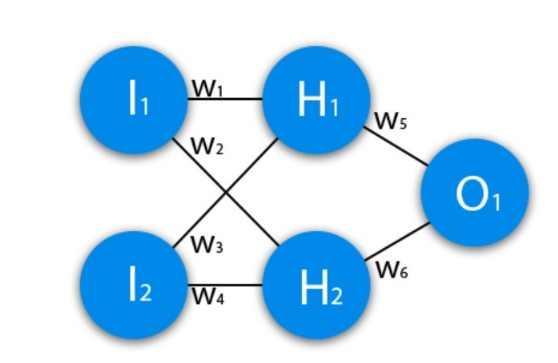

In [323]:
Image("Screenshot_6.jpg", width=500, height=300)

In [329]:
print('I1 = ', I1)
print('I2 = ', I2)
print('w1 = ', w1)
print('w2 = ', w2)
print('w3 = ', w3)
print('w4 = ', w4)
print('w5 = ', w5)
print('w6 = ', w6)

I1 =  1
I2 =  0
w1 =  0.5609160824493554
w2 =  0.6258343496720618
w3 =  -0.12
w4 =  0.13
w5 =  1.5633038058047803
w6 =  -2.2289168491578506


In [332]:
H1_inp = I1*w1 + I2*w3
print('H1_inp = ', H1_inp)
H1_out = sigmo(H1_inp)
print('H1_out = ', H1_out)


H1_inp =  0.5609160824493554
H1_out =  0.6366644775764897


In [333]:
H2_inp = I1*w2 + I2*w4
print('H2_inp = ', H2_inp)
H2_out = sigmo(H2_inp)
print('H2_out = ', H2_out)


H2_inp =  0.6258343496720618
H2_out =  0.651544314620324


In [335]:
O1_inp = H1_out*w5 + H2_out*w6
print('O1_inp = ', O1_inp)
O1_out = sigmo(O1_inp)
print('O1_out = ', O1_out)


O1_inp =  -0.4569381000142053
O1_out =  0.3877124425158984


In [337]:
# считаем новую ошибку (до этого при входных [1,0] квадратичная ошибка составляла 0,435)
error = (1 - O1_out )**2 / 1
error

0.37489605304984697

In [340]:
# снижение ошибки на лицо - на 13%!
(0.435 - error)/0.435

0.13816999298885754

In [ ]:
I1=1
I2=0
w1=0.45
w2=0.78
w3=-0.12
w4=0.13
w5=1.5
w6=-2.3
X_train = [[0,0], [0,1], [1,0], [1,1]]
y_train = [0,1,1,0] 

In [ ]:
def n_net(i1,i2,w1,w2,w3,w4,w5,w6):
    H1_inp = i1*w1 + i2*w3
    H1_out = sigmo(H1_inp)

    H2_inp = i1*w2 + i2*w4
    H2_out = sigmo(H2_inp)

    O1_inp = H1_out*w5 + H2_out*w6
    O1_out = sigmo(O1_inp)

    return O1_out


In [321]:
n = 0
true_vals=[]
pred_vals = []

for x,y in zip(X_train, y_train):
    pred_val = n_net(i1=x[0],i2=x[1],w1=w1,w2=w2,w3=w3,w4=w4,w5=w5,w6=w6)
    print('INPUT:{}'.format(x))
    print('RESULT:{:.3f}'.format(pred_val))
    pred_vals.append(pred_val)
    print('CORRECT:{}'.format(y))
    true_vals.append(y)
    error = (y - pred_val)**2
    print('SQUARED ERROR (по одной итерации) = ({:.3f} - {:.3f})**2 = {:.3f}'.format(y, pred_val, error))
    print('-'*10)
print('RMSE (по эпохе): {:.3f}'.format(rmse(true_vals, pred_vals)))

INPUT:[0, 0]
RESULT:0.418
CORRECT:0
SQUARED ERROR (по одной итерации) = (0.000 - 0.418)**2 = 0.174
----------
INPUT:[0, 1]
RESULT:0.389
CORRECT:1
SQUARED ERROR (по одной итерации) = (1.000 - 0.389)**2 = 0.373
----------
INPUT:[1, 0]
RESULT:0.388
CORRECT:1
SQUARED ERROR (по одной итерации) = (1.000 - 0.388)**2 = 0.375
----------
INPUT:[1, 1]
RESULT:0.362
CORRECT:0
SQUARED ERROR (по одной итерации) = (0.000 - 0.362)**2 = 0.131
----------
RMSE (по эпохе): 0.513
